In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imageio import imread
from tqdm import tqdm
from tensorflow.keras.models import load_model
import tempfile
import os

In [3]:
# Loading Training and Test Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('Test_fCbTej3_0j1gHmj.csv')
# Converting train images into Vectors
img_list=list()
for img_name in tqdm(train_data.filename,desc='Processing...'):
    # Image path
    img_path=os.path.join('./Images/train/',img_name)
    # Reading the image as Gray Scaled image
    img=imread(img_path,as_gray=True)
    img_list.append(img)
X_train = np.stack(img_list)
X_train/=255
X_train=np.expand_dims(X_train,-1).astype('float32')

Processing...: 100%|████████████████████████████████████████████████████████████| 49000/49000 [03:43<00:00, 219.32it/s]


In [4]:
# Converting test images into Vectors
img_list=list()
for img_name in tqdm(test_data.filename):
    # Image path
    img_path=os.path.join('./Images/test/',img_name)
    # Reading the image as Gray Scaled image
    img=imread(img_path,as_gray=True)
    img_list.append(img)
X_test = np.stack(img_list)
X_test/=255
X_test=np.expand_dims(X_test,-1).astype('float32')

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:33<00:00, 224.54it/s]


In [5]:
print(X_train.shape)
print(X_test.shape)

(49000, 28, 28, 1)
(21000, 28, 28, 1)


In [6]:
y_train=to_categorical(train_data.label,10)
print(y_train.shape)

(49000, 10)


In [7]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3,random_state=16)
print(X_train.shape)
print(X_val.shape)

(34300, 28, 28, 1)
(14700, 28, 28, 1)


In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_11_layer=model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/50
268/268 [==============================] - 2s 9ms/step - loss: 0.5850 - accuracy: 0.8114 - val_loss: 0.1268 - val_accuracy: 0.9612
Epoch 2/50
268/268 [==============================] - 2s 8ms/step - loss: 0.1518 - accuracy: 0.9553 - val_loss: 0.0797 - val_accuracy: 0.9761
Epoch 3/50
268/268 [==============================] - 2s 8ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.0645 - val_accuracy: 0.9798
Epoch 4/50
268/268 [==============================] - 2s 8ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 5/50
268/268 [==============================] - 2s 8ms/step - loss: 0.0735 - accuracy: 0.9777 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 6/50
268/268 [==============================] - 2s 8ms/step - loss: 0.0648 - accuracy: 0.9814 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 7/50
268/268 [==============================] - 2s 8ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0477 - val_accuracy: 0.9857
Epoch 

In [10]:
model.evaluate(X_val,y_val)

460/460 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9910


[0.04400719702243805, 0.9910203814506531]

In [11]:
y_pred=model.predict_classes(X_test)
print(y_pred.shape)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(21000,)


4


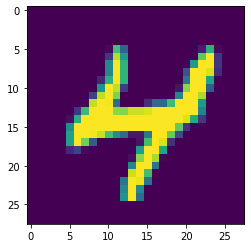

In [12]:
print(y_pred[0])
plt.imshow(X_test[0])

In [48]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets


4


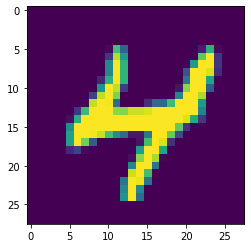

In [49]:
m=load_model('./model/')
y_pred=m.predict_classes(X_test)
print(y_pred[0])
plt.imshow(X_test[0])

In [20]:
sample_submission=pd.read_csv('sample_submission_npBPSZB.csv')

In [2]:
import os
os.getcwd()

'D:\\STudy\\ML Degree\\Practice\\MNIST'

In [21]:
sample_submission.filename = test_data.filename
sample_submission.label = y_pred
sample_submission.to_csv('submission.csv',index=False)